<a href="https://colab.research.google.com/github/Umashankar8074/prml/blob/main/prml_termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


In [ ]:
df.Loan_ID.value_counts(dropna = False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [ ]:
df.Gender.value_counts(dropna = False)


Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

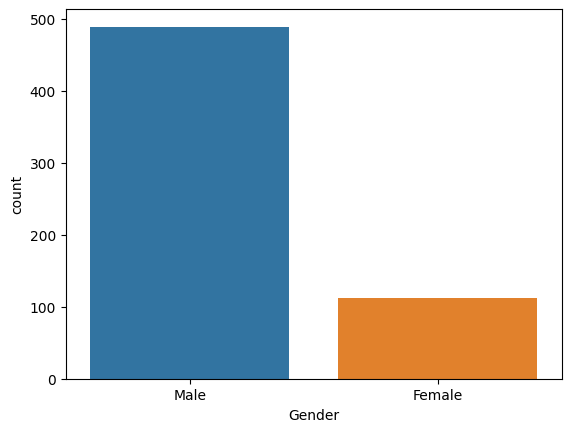

In [ ]:
sns.countplot(x = "Gender", data = df)
plt.show()

In [ ]:
male_count = len(df[df.Gender == 'Male'])
female_count = len(df[df.Gender == 'Female'])
null_count = len(df[df.Gender.isnull()])

print("male percentage :", ((male_count)/len(df.Gender)*100))
print("female percentage :", ((female_count)/len(df.Gender)*100))
print("missing values percentage :", ((null_count)/len(df.Gender)*100))


male percentage : 79.64169381107492
female percentage : 18.241042345276874
missing values percentage : 2.1172638436482085


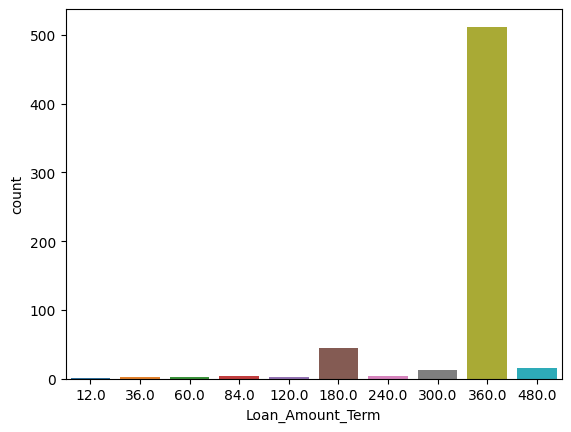

In [ ]:
df.Loan_Amount_Term.value_counts(dropna = False)

sns.countplot(x = "Loan_Amount_Term", data = df)
plt.show()

Now numerical variables

Describing the numerical variables, this will show mean, count, std, min, max and others using the describe function.

In [ ]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

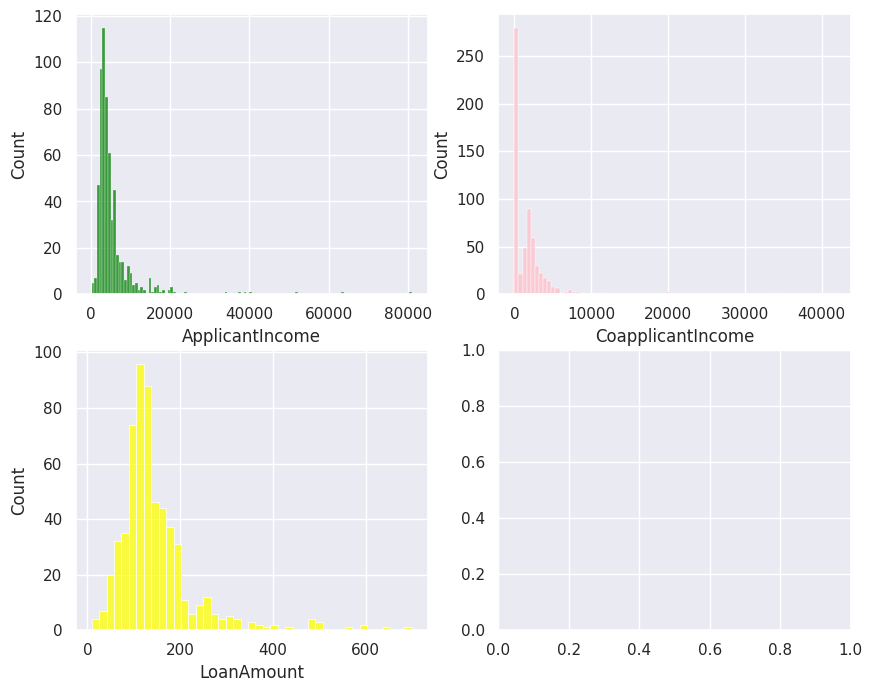

In [ ]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

sns.histplot(data = df, x = "ApplicantIncome", ax = axs[0,0], color = "green")
sns.histplot(data = df, x = "CoapplicantIncome", ax = axs[0,1], color = "pink")
sns.histplot(data = df, x = "LoanAmount", ax = axs[1,0], color = "yellow")

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

**Data Preprocessing**

1) Remove unecessary variables

In [ ]:
# print(df)
df = df.drop(['Loan_ID'], axis = 1)


In [ ]:
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

2) Data Imputation


> Imputation is technique for substituting an estimated value for missing values in the dataset.


> Imputation for categorical variables will be performed using mode.

> Imputation for numerical variables will be performed using mean.









2.1) Categorical variables

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [ ]:
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

2.2) Numerical variables

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [ ]:
print(df)
df.isnull().sum()

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

3) One-hot Encoding


> One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.



In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)


In [ ]:
print(df)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History  Gender  Married  Dependents_0  Dependents_1  \
0               1.0       1        0             1     

In [ ]:
print(df.shape)

(614, 17)


4) Remove Outliers and infinite values

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)

# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis = 1)]

In [ ]:
print(df.shape)

(614, 17)


<Axes: >

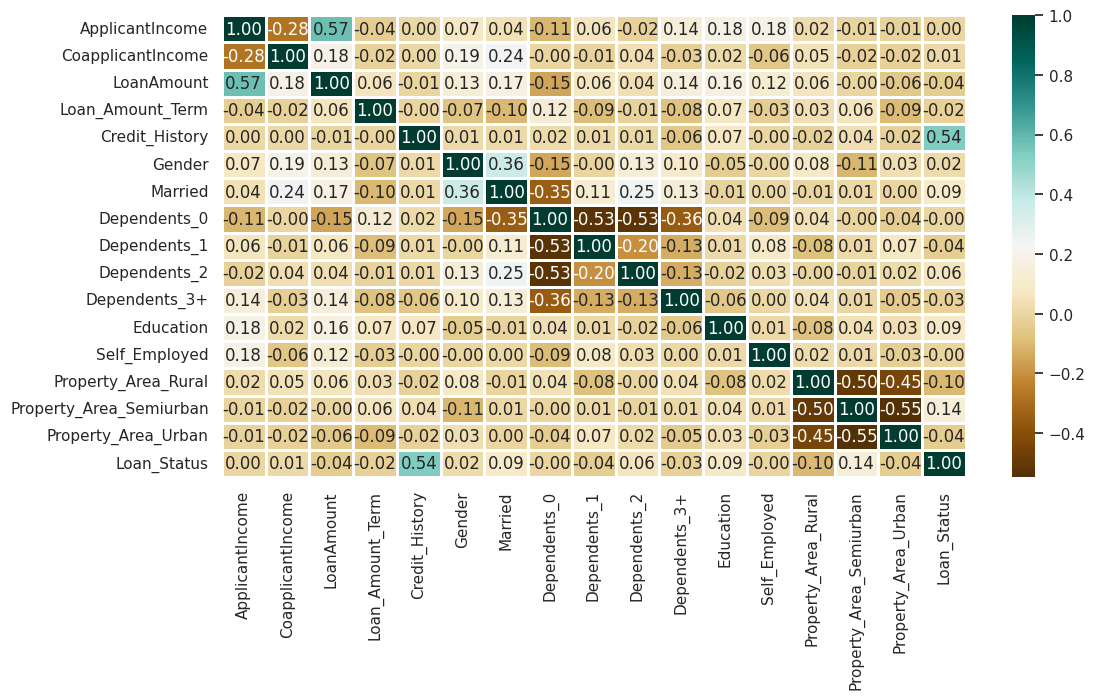

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(), cmap = "BrBG", fmt = '.2f', linewidths = 2, annot = True)

 --> for normalizing the distribution we use square root transformation.

In [ ]:
# Square root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

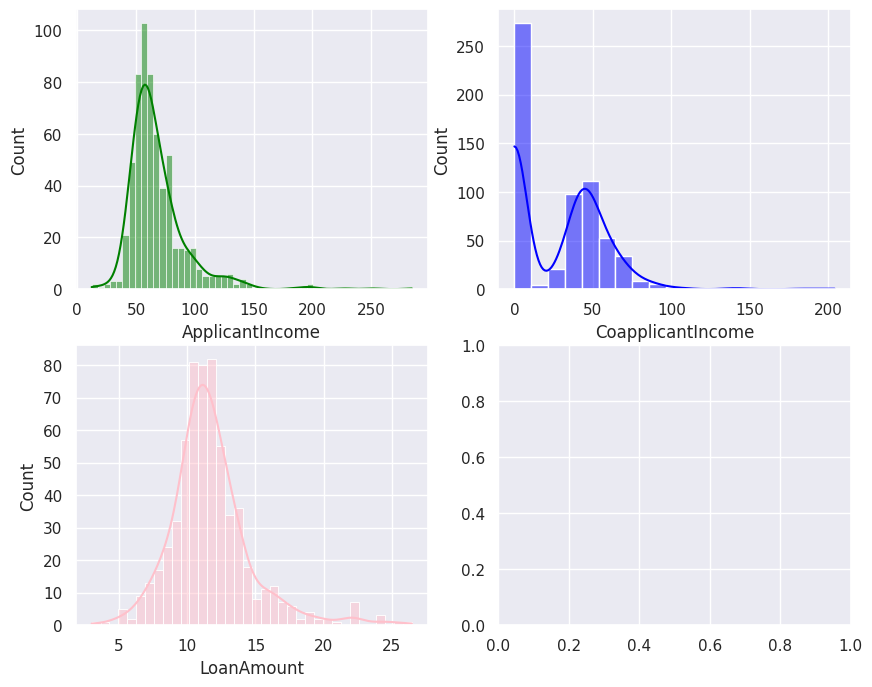

In [ ]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(2, 2, figsize= (10, 8))

sns.histplot(data = df, x = "ApplicantIncome", ax = axs[0,0], kde = True, color = 'green')
sns.histplot(data = df, x = "CoapplicantIncome", ax = axs[0,1], kde = True, color = 'blue')
sns.histplot(data = df, x = "LoanAmount", ax = axs[1,0], kde = True, color = 'pink')

5) Features seperating

> Dependent features (here it is Loan_Status) will be seperated from independent features.



In [ ]:
print(df.shape)

(614, 17)


In [ ]:
print(df)
X = df.drop(["Loan_Status"], axis = 1)
print(X)
Y = df["Loan_Status"]
print(Y)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          76.478755           0.000000   12.100089             360.0   
1          67.697858          38.832976   11.313708             360.0   
2          54.772256           0.000000    8.124038             360.0   
3          50.823223          48.559242   10.954451             360.0   
4          77.459667           0.000000   11.874342             360.0   
..               ...                ...         ...               ...   
609        53.851648           0.000000    8.426150             360.0   
610        64.078077           0.000000    6.324555             180.0   
611        89.844310          15.491933   15.905974             360.0   
612        87.080423           0.000000   13.674794             360.0   
613        67.697858           0.000000   11.532563             360.0   

     Credit_History  Gender  Married  Dependents_0  Dependents_1  \
0               1.0       1        0             1     

SMOTE Technique

> SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in machine learning datasets, particularly in the context of binary classification problems where one class is underrepresented. The goal of SMOTE is to oversample the minority class by generating synthetic examples to balance the class distribution.



In [ ]:
X, Y = SMOTE().fit_resample(X, Y)

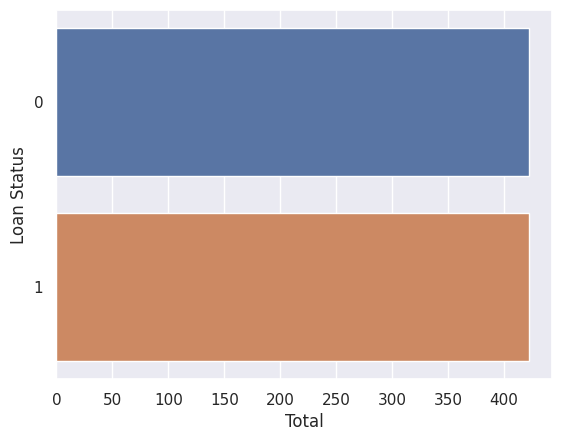

In [ ]:
sns.set_theme(style = "darkgrid")
sns.countplot(y = Y, data = df)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

Data Normalization

> data normalization will be performed to normalize the range of independent variables or features of data.



In [ ]:
X = MinMaxScaler().fit_transform(X)

Splitting Data Set

> The data set will be split into 80% train and 20% test.



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**MODELS**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import CategoricalNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

1) logistic regression

In [ ]:
LRclassifier = LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)
LRclassifier.fit(X_train, Y_train)

Y_pred = LRclassifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
LR_Acc = accuracy_score(Y_pred, Y_test)
print('LR accuracy : ', LR_Acc)


              precision    recall  f1-score   support

           0       0.98      0.64      0.77        86
           1       0.73      0.99      0.84        83

    accuracy                           0.81       169
   macro avg       0.85      0.81      0.81       169
weighted avg       0.86      0.81      0.81       169

[[55 31]
 [ 1 82]]
LR accuracy :  0.8106508875739645


2) K-Nearest Neighbours (KNN)

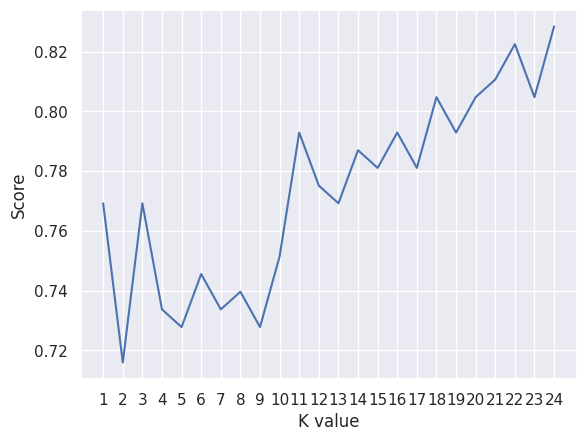

KNN best accuracy :  0.8284023668639053


In [ ]:
scorelistknn = []
for i in range(1, 25):
  KNclassifier = KNeighborsClassifier(n_neighbors = i)
  KNclassifier.fit(X_train, Y_train)
  scorelistknn.append(KNclassifier.score(X_test, Y_test))

plt.plot(range(1,25), scorelistknn)
plt.xticks(np.arange(1,25,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNN_Acc = max(scorelistknn)
print("KNN best accuracy : " , KNN_Acc)


3) Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel = 'rbf', max_iter = 500)
SVCclassifier.fit(X_train, Y_train)

Y_pred = SVCclassifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
SVC_Acc = accuracy_score(Y_pred, Y_test)
print('LR accuracy : ', SVC_Acc)

              precision    recall  f1-score   support

           0       0.98      0.63      0.77        86
           1       0.72      0.99      0.83        83

    accuracy                           0.80       169
   macro avg       0.85      0.81      0.80       169
weighted avg       0.85      0.80      0.80       169

[[54 32]
 [ 1 82]]
LR accuracy :  0.8047337278106509


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


4) Decision Tree

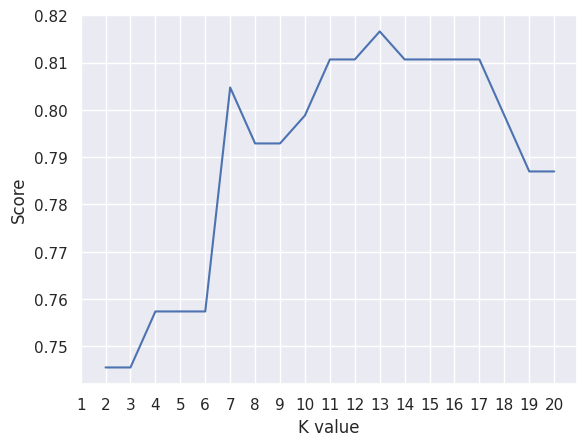

DT best accuracy :  0.8165680473372781


In [ ]:
scorelistDT = []
for i in range(2, 21):
  DTclassifier = DecisionTreeClassifier(max_leaf_nodes = i)
  DTclassifier.fit(X_train, Y_train)
  scorelistDT.append(DTclassifier.score(X_test, Y_test))

plt.plot(range(2,21), scorelistDT)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
DT_Acc = max(scorelistDT)
print("DT best accuracy : " , DT_Acc)